# to do:

#### phosphor converted led vs daylight (?)
#### add in reflectance/reflected objects
#### add in circadian entrainment curve

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp
from matplotlib.patches import Rectangle
import matplotlib

In [2]:
# setup the plots
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure tit
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)
matplotlib.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure tit

# Import Data (log or no)

In [3]:
df = pd.read_excel('bgyord.xlsx', sheet_name = "wavelengths") # import data from excel sheet (variables correspond to column with that variable name)
wavelengths = df["wavelength"] 
blue = df["blue"]
green = df["green"]
yellow = df["yellow"]
orange = df["orange"]
red = df["red"]
dark_red = df["dark red"]
daylight = df["daylight"]
overcast = df["Sample Overcast"]
led2700 = df["Sample LED 2700 K"]
led4000 = df["Sample LED 4000 K"]
fluorescent2950 = df["Sample Fluorescent 2950 K"]
fluorescent4000 = df["Sample Fluorescent 4000 K"]
fluorescent6500 = df["Sample Fluorescent 6500 K"]
llred = df["llred"] #ll -> lighting lab
llwhite = df["llwhite"]
llamber = df["llamber"]
llgreen = df["llgreen"]
llcyan = df["llcyan"]
llblue = df["llblue"]
llindigo = df["llindigo"]
df = pd.read_excel('sensitivity.xlsx', sheet_name = "sensitivity curves")
bluenm = df["450 log scaled"]
othernm = df["556 log scaled"]
up = df["upper log scaled"]
df = pd.read_excel('WELL EML ratio calculator to test SPD combinations for D22 fixtures.xlsx', sheet_name = "Circadian") # import data from excel sheet
circadian = df["circadian"]
visual = df["visual"]
df = pd.read_excel('Color discrimination v2.xlsx', sheet_name = "Sheet1")
# print(df)
color1 = df["C1"]
color2 = df["C2"]
color3 = df["C3"]
color4 = df["C4"]
color5 = df["C5"]
color6 = df["C6"]
color7 = df["C7"]
color8 = df["C8"]
color9 = df["C9"]
color10 = df["C10"]
color11 = df["C11"]
color12 = df["C12"]
color13 = df["C13"]
color14 = df["C14"]
color15 = df["C15"]
color16 = df["C16"]
color17 = df["C17"]
color18 = df["C18"]
color19 = df["C19"]
color20 = df["C20"]
color21 = df["C21"]
color22 = df["C22"]
color23 = df["C23"]
color24 = df["C24"]

C:\Users\kenda\Downloads\Programs\anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


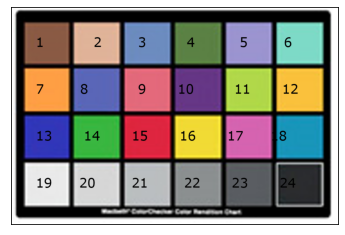

In [4]:
# color chart
fig, ax = plt.subplots()
image = plt.imread('color.png')
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

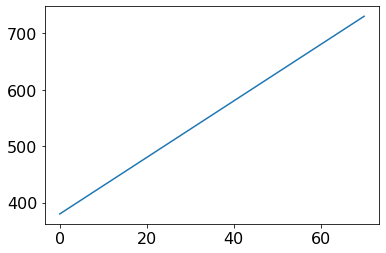

In [5]:
plt.plot(wavelengths)

In [6]:
cones = bluenm + othernm

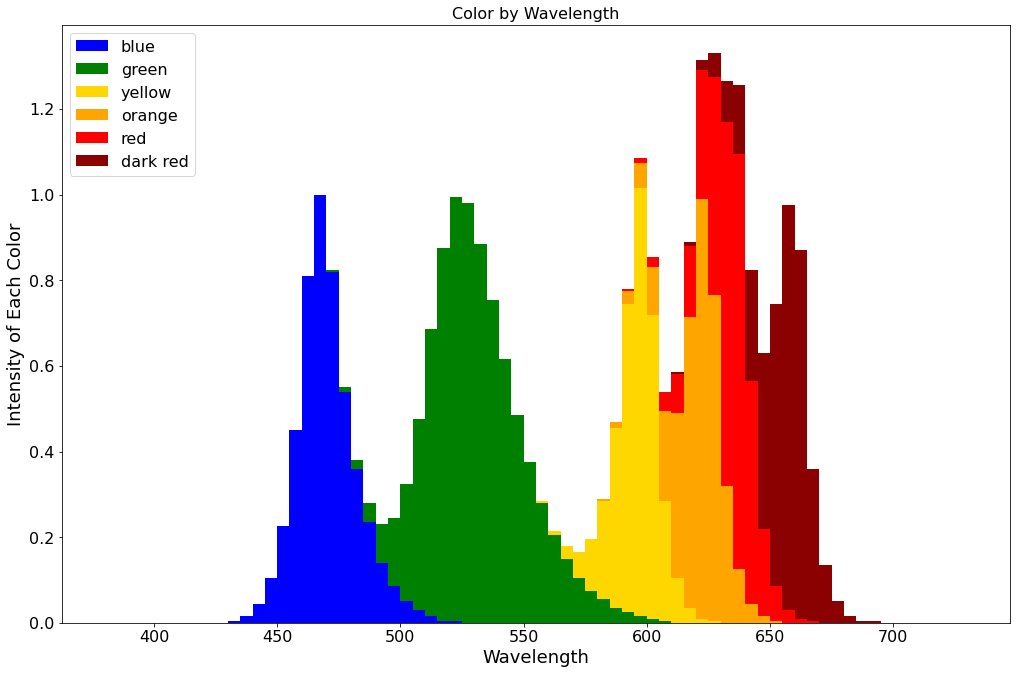

In [7]:
fig, ax = plt.subplots(figsize=(17,11))

width = []
for n in range((len(wavelengths))-1):
    width += [wavelengths[n+1]-wavelengths[n]]
    
# ax.bar(wavelengths[:-1], daylight[:-1], width, color="lightgray", align='edge', label="daylight")
ax.bar(wavelengths[:-1], blue[:-1], width, color="blue", align='edge', label="blue")
ax.bar(wavelengths[:-1], green[:-1], width, bottom=blue[:-1], color="green", align='edge', label="green")
ax.bar(wavelengths[:-1], yellow[:-1], width, bottom=blue[:-1]+green[:-1], color="gold", align='edge', label="yellow")
ax.bar(wavelengths[:-1], orange[:-1], width, bottom=blue[:-1]+green[:-1]+yellow[:-1], color="orange", align='edge', label="orange")
ax.bar(wavelengths[:-1], red[:-1], width, bottom=blue[:-1]+green[:-1]+yellow[:-1]+orange[:-1], color="red", align='edge', label="red")
ax.bar(wavelengths[:-1], dark_red[:-1], width, bottom=blue[:-1]+green[:-1]+yellow[:-1]+orange[:-1]+red[:-1], color="darkred", align='edge', label="dark red")
# ax.bar(wavelengths[:-1], bluenm[:-1], width, color="black", align='edge', label="450 nm")
# ax.bar(wavelengths[:-1], othernm[:-1], width, color="black", align='edge', label="556 nm")
# ax.add_patch(Rectangle((480,0), 20, 1.4,edgecolor="black", fill=None))
# ax.add_patch(Rectangle((550,0), 30, 1.4,edgecolor="black", fill=None, label="Undesired Wavelength Range"))
# plt.plot(wavelengths[:-1], bluenm[:-1], color="black", label="450 nm log sensitivity")
# plt.plot(wavelengths[:-1], othernm[:-1], color="black", label="556 nm log sensitivity")
ax.set_ylabel('Intensity of Each Color')
ax.set_xlabel('Wavelength')
ax.set_title('Color by Wavelength')
ax.legend(loc="upper left")
plt.show()

In [8]:
upper = up[:-8]

ValueError: shape mismatch: objects cannot be broadcast to a single shape

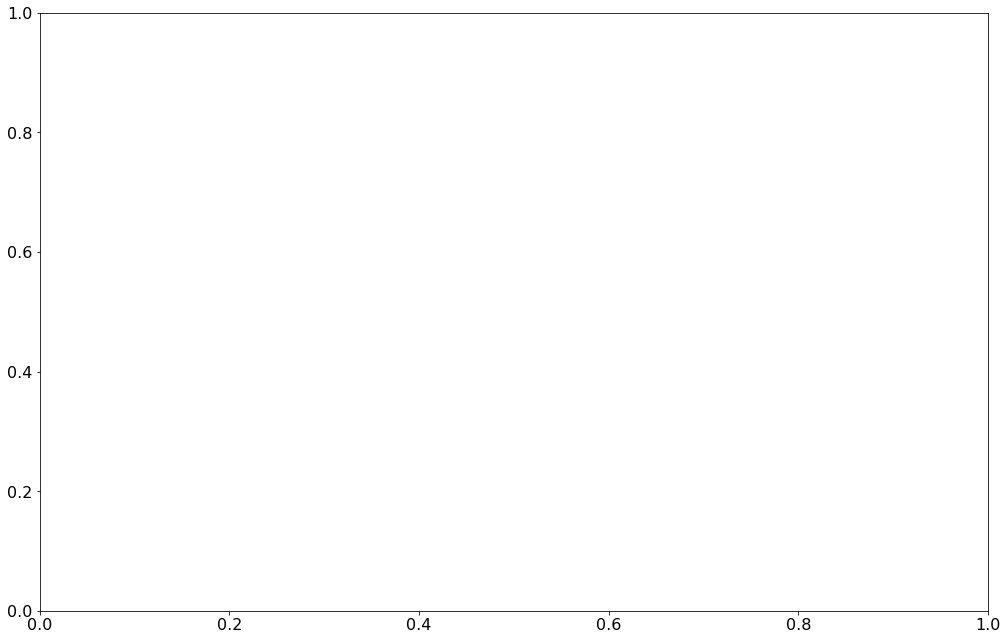

In [9]:
fig, ax = plt.subplots(figsize=(17,11))

width = []
for n in range((len(wavelengths))-1):
    width += [wavelengths[n+1]-wavelengths[n]]
    
ax.bar(wavelengths[:-1], daylight[:-1]*upper[:-1], width, color="lightgray", align='edge', label="daylight")
ax.bar(wavelengths[:-1], blue[:-1]*upper[:-1], width, color="blue", align='edge', label="blue")
ax.bar(wavelengths[:-1], green[:-1]*upper[:-1], width, bottom=blue[:-1]*upper[:-1], color="green", align='edge', label="green")
ax.bar(wavelengths[:-1], yellow[:-1]*upper[:-1], width, bottom=blue[:-1]*upper[:-1]+green[:-1]*upper[:-1], color="gold", align='edge', label="yellow")
ax.bar(wavelengths[:-1], orange[:-1]*upper[:-1], width, bottom=blue[:-1]*upper[:-1]+green[:-1]*upper[:-1]+yellow[:-1]*upper[:-1], color="orange", align='edge', label="orange")
ax.bar(wavelengths[:-1], red[:-1]*upper[:-1], width, bottom=blue[:-1]*upper[:-1]+green[:-1]*upper[:-1]+yellow[:-1]*upper[:-1]+orange[:-1]*upper[:-1], color="red", align='edge', label="red")
ax.bar(wavelengths[:-1], dark_red[:-1]*upper[:-1], width, bottom=blue[:-1]*upper[:-1]+green[:-1]*upper[:-1]+yellow[:-1]*upper[:-1]+orange[:-1]*upper[:-1]+red[:-1]*upper[:-1], color="darkred", align='edge', label="dark red")
# ax.bar(wavelengths[:-1], bluenm[:-1], width, color="black", align='edge', label="450 nm")
# ax.bar(wavelengths[:-1], othernm[:-1], width, color="black", align='edge', label="556 nm")
# ax.add_patch(Rectangle((480,0), 20, 1.4,edgecolor="black", fill=None))
# ax.add_patch(Rectangle((550,0), 30, 1.4,edgecolor="black", fill=None, label="Undesired Wavelength Range"))
# plt.plot(wavelengths[:-1], bluenm[:-1], color="black", label="450 nm log sensitivity")
# plt.plot(wavelengths[:-1], othernm[:-1], color="black", label="556 nm log sensitivity")
ax.set_ylabel('Intensity of Each Color')
ax.set_xlabel('Wavelength')
ax.set_title('Color by Wavelength')
ax.legend(loc="upper left")
plt.show()

## Upper vs Daylight (not squared)

In [ ]:
# multiply curves by these variables to find how many of each you want
b = cp.Variable(integer=True)
g = cp.Variable(integer=True)
y = cp.Variable(integer=True)
o = cp.Variable(integer=True)
r = cp.Variable(integer=True)
dr = cp.Variable(integer=True)

constraints = []
constraints += [b >= 0]
constraints += [g >= 0]
constraints += [y >= 0]
constraints += [o >= 0]
constraints += [r >= 0]
constraints += [dr >= 0]
constraints += [b <= 255]
constraints += [g <= 255]
constraints += [y <= 255]
constraints += [o <= 255]
constraints += [r <= 255]
constraints += [dr <= 255]

# difference between daylight and actual curves
# using squared because i want to minimize this difference
diff = []
for n in range(len(wavelengths)-1):
    diff += [((wavelengths[n+1]-wavelengths[n])*((daylight[n]*255*upper[n] - upper[n]*(cp.multiply(b, blue[n]) +
                            cp.multiply(g, green[n]) +
                            cp.multiply(y, yellow[n]) +
                            cp.multiply(o, orange[n]) +
                            cp.multiply(r, red[n]) + 
                            cp.multiply(dr, dark_red[n])))))**2]
                    
objective = sum(diff) 
problem = cp.Problem(cp.Minimize(objective), constraints)
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

print("status:", prob.status)
print("blue:", b.value, "\n", 
      "green:", g.value, "\n", 
      "yellow:", y.value, "\n",
      "orange:", o.value, "\n", 
      "red:", r.value, "\n", 
      "dark red:", dr.value)
print("diff:", (objective.value))

# plotting
bl = []
for n in range(len(wavelengths)-1):
    bl += [b.value*blue[n]*upper[n]]
gr = []
gr_p = []
for n in range(len(wavelengths)-1):
    gr += [g.value*green[n]*upper[n]]
    gr_p += [gr[n] + bl[n]]
ye = []
ye_p = []
for n in range(len(wavelengths)-1):
    ye += [y.value*yellow[n]*upper[n]]
    ye_p += [ye[n] + gr_p[n]]
ora = []
ora_p = []
for n in range(len(wavelengths)-1):
    ora += [o.value*orange[n]*upper[n]]
    ora_p += [ora[n] + ye_p[n]]
re = []
re_p = []
for n in range(len(wavelengths)-1):
    re += [r.value*red[n]*upper[n]]
    re_p += [re[n] + ora_p[n]]
dar = []
for n in range(len(wavelengths)-1):
    dar += [dr.value*dark_red[n]*upper[n]]

fig, ax = plt.subplots(figsize=(17,11))
    
ax.bar(wavelengths[:-1], daylight[:-1]*255*upper[:-1], width, color="lightgray", align='edge', label="daylight")
ax.bar(wavelengths[:-1], bl, width, color="blue", align='edge', label="blue")
ax.bar(wavelengths[:-1], gr, width, bottom=bl, color="green", align='edge', label="green")
ax.bar(wavelengths[:-1], ye, width, bottom=gr_p, color="gold", align='edge', label="yellow")
ax.bar(wavelengths[:-1], ora, width, bottom=ye_p, color="orange", align='edge', label="orange")
ax.bar(wavelengths[:-1], re, width, bottom=ora_p, color="red", align='edge', label="red")
ax.bar(wavelengths[:-1], dar, width, bottom=re_p, color="darkred", align='edge', label="dark red")
# ax.add_patch(Rectangle((480,0), 20, 1.2,edgecolor="black", fill=None))
# ax.add_patch(Rectangle((550,0), 30, 1.2,edgecolor="black", fill=None, label="Undesired Wavelength Range"))

ax.set_ylabel('Amount of Each Color (255 is 100%)')
ax.set_xlabel('Wavelength')
ax.set_title('Color by Wavelength')

ax.legend()
plt.show()

# Matching Areas

In [ ]:
# multiply curves by these variables to find how many of each you want
b = cp.Variable(integer=True)
g = cp.Variable(integer=True)
y = cp.Variable(integer=True)
o = cp.Variable(integer=True)
r = cp.Variable(integer=True)
dr = cp.Variable(integer=True)

constraints = []
constraints += [b >= 0]
constraints += [g >= 0]
constraints += [y >= 0]
constraints += [o >= 0]
constraints += [r >= 0]
constraints += [dr >= 0]
constraints += [b <= 255]
constraints += [g <= 255]
constraints += [y <= 255]
constraints += [o <= 255]
constraints += [r <= 255]
constraints += [dr <= 255]

# difference between daylight and actual curves
# using squared because i want to minimize this difference
diff = []
blu = []
oth = []
for n in range(len(wavelengths)-1): #(wavelengths[n+1]-wavelengths[n])*
    blu += [bluenm[n]*(cp.multiply(b, blue[n]) + cp.multiply(g, green[n]) + 
                                                         cp.multiply(y, yellow[n]) + cp.multiply(o, orange[n]) + 
                                                         cp.multiply(r, red[n]) + cp.multiply(dr, dark_red[n]))]
    oth += [othernm[n]*(cp.multiply(b, blue[n]) + cp.multiply(g, green[n]) + 
                                                         cp.multiply(y, yellow[n]) + cp.multiply(o, orange[n]) + 
                                                         cp.multiply(r, red[n]) + cp.multiply(dr, dark_red[n]))]
    diff += [(blu[n]-oth[n])**2]
                    
objective = sum(diff) 
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

print("status:", prob.status)
print("blue:", b.value, "\n", 
      "green:", g.value, "\n", 
      "yellow:", y.value, "\n",
      "orange:", o.value, "\n", 
      "red:", r.value, "\n", 
      "dark red:", dr.value)
print("diff:", (objective.value))

blueplot = []
otherplot = []
for n in range(len(blu)):
    blueplot += [blu[n].value]
    otherplot += [oth[n].value]
fig, ax = plt.subplots(figsize=(17,11))
ax.bar(wavelengths[:-1], blueplot, width, color="blue", alpha = 0.6, align='edge', label="blue cone")
ax.bar(wavelengths[:-1], otherplot, width, color="gold", alpha = 0.6, align='edge', label="yellow (?) cone")


ax.set_ylabel('Amount of Each Color (255 is 100%)')
ax.set_xlabel('Wavelength')
ax.set_title('Color by Wavelength')

ax.legend()
plt.show()